In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Read the loan data and analyse
loan_raw_df = pd.read_csv('loan.csv')
loan_raw_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
#Check for null columns and data type
loan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_raw_df.describe()
##Observation :
##Total 39717 rows and 111 columns
##Many columns with missing values

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

<b>Data Pre-Processing</b>

In [6]:
#Missing value Treatment
#1. Columns with all values NULL
loan_raw_df.loc[:, loan_raw_df.count() == 0].columns.size #54 columns with only null values

54

In [7]:
##drop those columns
loan_pre_df = loan_raw_df.loc[:, loan_raw_df.count() > 0]
loan_pre_df.shape

(39717, 57)

In [8]:
#Columns reduced to 57
#2. Columns with more than 50% of the records null
loan_pre_df.loc[:, loan_pre_df.count() < loan_pre_df.shape[0]/2].columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [9]:
#Drop the columns with more than 50% of records NULL
loan_pre_df = loan_pre_df.loc[:, loan_pre_df.count() > loan_pre_df.shape[0]/2]
loan_pre_df.shape

(39717, 54)

In [10]:
#Further Columns with missing values
loan_pre_df.loc[:, loan_pre_df.count() != loan_pre_df.shape[0]].columns
#Analyse these columns later

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [11]:
#Colums with only one distinct value/null and one distinct value
#loan_raw_df.loc[:, loan_raw_df == 1].columns
single_value_cols = [col for col in loan_pre_df.columns if len(loan_pre_df[col].dropna().unique()) == 1]
single_value_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [12]:
#Drop the columns with only single value
loan_pre_df=loan_pre_df.drop(columns=single_value_cols)
loan_pre_df.shape

(39717, 45)

In [13]:
##Objective : to understand the driving factors (or driver variables) behind loan default, 
##i.e. the variables which are strong indicators of default.
##These factors should be able o identify the risky applicants at the time of approving loan.
##Hence need to analyse the variables available at the time of loan application.
##Better to understand remove the variables which are generated post approval of loan.

In [14]:
###Analysing the variables and categoring them to important or not. 
###Cleanup of variables not needed for analysis
loan_pre_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
#Id columns [Remove]
##'id', 'member_id'
#Numerical - Important variables
num_vars = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
'total_acc',  'pub_rec_bankruptcies']
#Categorical - Important variables
cat_vars = ['term', 'grade', 'sub_grade', 'emp_title','home_ownership', 'verification_status', 'loan_status', 'addr_state','purpose']
#Date variables
##'issue_d'
##Variables generated post approval of loan [Remove]
post_approve_vars = ['funded_amnt', 'funded_amnt_inv', 'earliest_cr_line','revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv',
'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']

#Further variables to inspect
##'url','desc','title','zip_code'
#url -> contains loan id [Remove]
#desc, title -> purpose column gives better info than these
other_vars = ['url','desc','title','zip_code','id', 'member_id']

In [16]:
loan_pre_df['title'].value_counts()

Debt Consolidation              2184
Debt Consolidation Loan         1729
Personal Loan                    659
Consolidation                    517
debt consolidation               505
                                ... 
98 Jeep Cherokee                   1
Shelby                             1
Jenna                              1
help money                         1
36 Months Starting July 2011       1
Name: title, Length: 19615, dtype: int64

In [17]:
##Remove the non-important variables
loan_pre_df = loan_pre_df.drop(columns=post_approve_vars)
loan_pre_df = loan_pre_df.drop(columns=other_vars)
loan_pre_df.shape

(39717, 22)

In [18]:
loan_pre_df.info()
## Now the columns reduced to 22

##Analyse the column data types are correct or not
##Suspicious ones:
#1   term                        39717 non-null  object 
#2   int_rate                    39717 non-null  object 
#7   emp_length                  38642 non-null  object [has null values, ignoring now from analysis]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [19]:
loan_pre_df[['term','int_rate','emp_length']]
##term is in months - to be cleaned
##int_rate has % - to be cleaned
##emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


term int_rate emp_length
0       36 months   10.65%  10+ years
1       60 months   15.27%   < 1 year
2       36 months   15.96%  10+ years
3       36 months   13.49%  10+ years
4       60 months   12.69%     1 year
...           ...      ...        ...
39712   36 months    8.07%    4 years
39713   36 months   10.28%    3 years
39714   36 months    8.07%   < 1 year
39715   36 months    7.43%   < 1 year
39716   36 months   13.75%   < 1 year

[39717 rows x 3 columns]

In [20]:
###Clean the columns
#term
loan_pre_df.term = loan_pre_df.term.apply(lambda x: str(x).replace(' months','')).astype('int64')
#int_rate
loan_pre_df.int_rate = loan_pre_df.int_rate.apply(lambda x: str(x).replace('%','')).astype('float64')
#emp_length
#Fill missing value with 0
loan_pre_df.emp_length = loan_pre_df.emp_length.fillna(0)
loan_pre_df.emp_length = loan_pre_df.emp_length.apply(lambda x: str(x).replace(' years','').replace(' year','').replace('< 1','1').replace('+','')).astype('int64')

In [21]:
loan_pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  int64  
 2   int_rate              39717 non-null  float64
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            39717 non-null  int64  
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [22]:
print(loan_pre_df.shape)
loan_pre_df.describe()

(39717, 22)


loan_amnt          term      int_rate   installment    emp_length  \
count  39717.000000  39717.000000  39717.000000  39717.000000  39717.000000   
mean   11219.443815     42.418007     12.021177    324.561922      4.954226   
std     7456.670694     10.622815      3.724825    208.874874      3.461960   
min      500.000000     36.000000      5.420000     15.690000      0.000000   
25%     5500.000000     36.000000      9.250000    167.020000      2.000000   
50%    10000.000000     36.000000     11.860000    280.220000      4.000000   
75%    15000.000000     60.000000     14.590000    430.780000      9.000000   
max    35000.000000     60.000000     24.590000   1305.190000     10.000000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.971700e+04  39717.000000  39717.000000    39717.000000  39717.000000   
mean   6.896893e+04     13.315130      0.146512        0.869200      9.294408   
std    6.379377e+04      6.678594      0.491812        1.070219      4.400282   
min    4.000000e+03      0.000000      0.000000        0.000000      2.000000   
25%    4.040400e+04      8.170000      0.000000        0.000000      6.000000   
50%    5.900000e+04     13.400000      0.000000        1.000000      9.000000   
75%    8.230000e+04     18.600000      0.000000        1.000000     12.000000   
max    6.000000e+06     29.990000     11.000000        8.000000     44.000000   

            pub_rec     total_acc  pub_rec_bankruptcies  
count  39717.000000  39717.000000          39020.000000  
mean       0.055065     22.088828              0.043260  
std        0.237200     11.401709              0.204324  
min        0.000000      2.000000              0.000000  
25%        0.000000     13.000000              0.000000  
50%        0.000000     20.000000              0.000000  
75%        0.000000     29.000000              0.000000  
max        4.000000     90.000000              2.000000

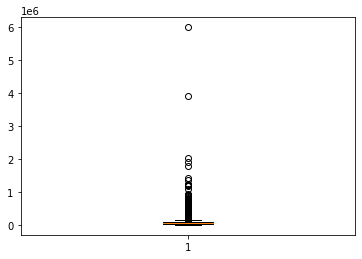

In [23]:
#annual_inc has outliers

plt.boxplot(loan_pre_df['annual_inc'])
plt.show()

In [24]:
#annual_inc has outliers
#Analyse other percentiles
print(loan_pre_df.annual_inc.quantile(np.linspace(.8, 1, 9, 0)))
print(loan_pre_df.annual_inc.quantile(np.linspace(.91, 1, 9, 0)))

0.800000     90000.000000
0.822222     95000.000000
0.844444    100000.000000
0.866667    104710.133333
0.888889    110000.000000
0.911111    120000.000000
0.933333    130000.000000
0.955556    150000.000000
0.977778    180000.000000
Name: annual_inc, dtype: float64
0.91    120000.00
0.92    123000.00
0.93    128371.80
0.94    135000.00
0.95    142000.00
0.96    150000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64


In [25]:
##99 percentile looks good for analysis
#Remove > 99 percentile 
loan_pre_df = loan_pre_df[loan_pre_df.annual_inc <= loan_pre_df.annual_inc.quantile(0.99)]

In [26]:
loan_pre_df.shape

(39319, 22)

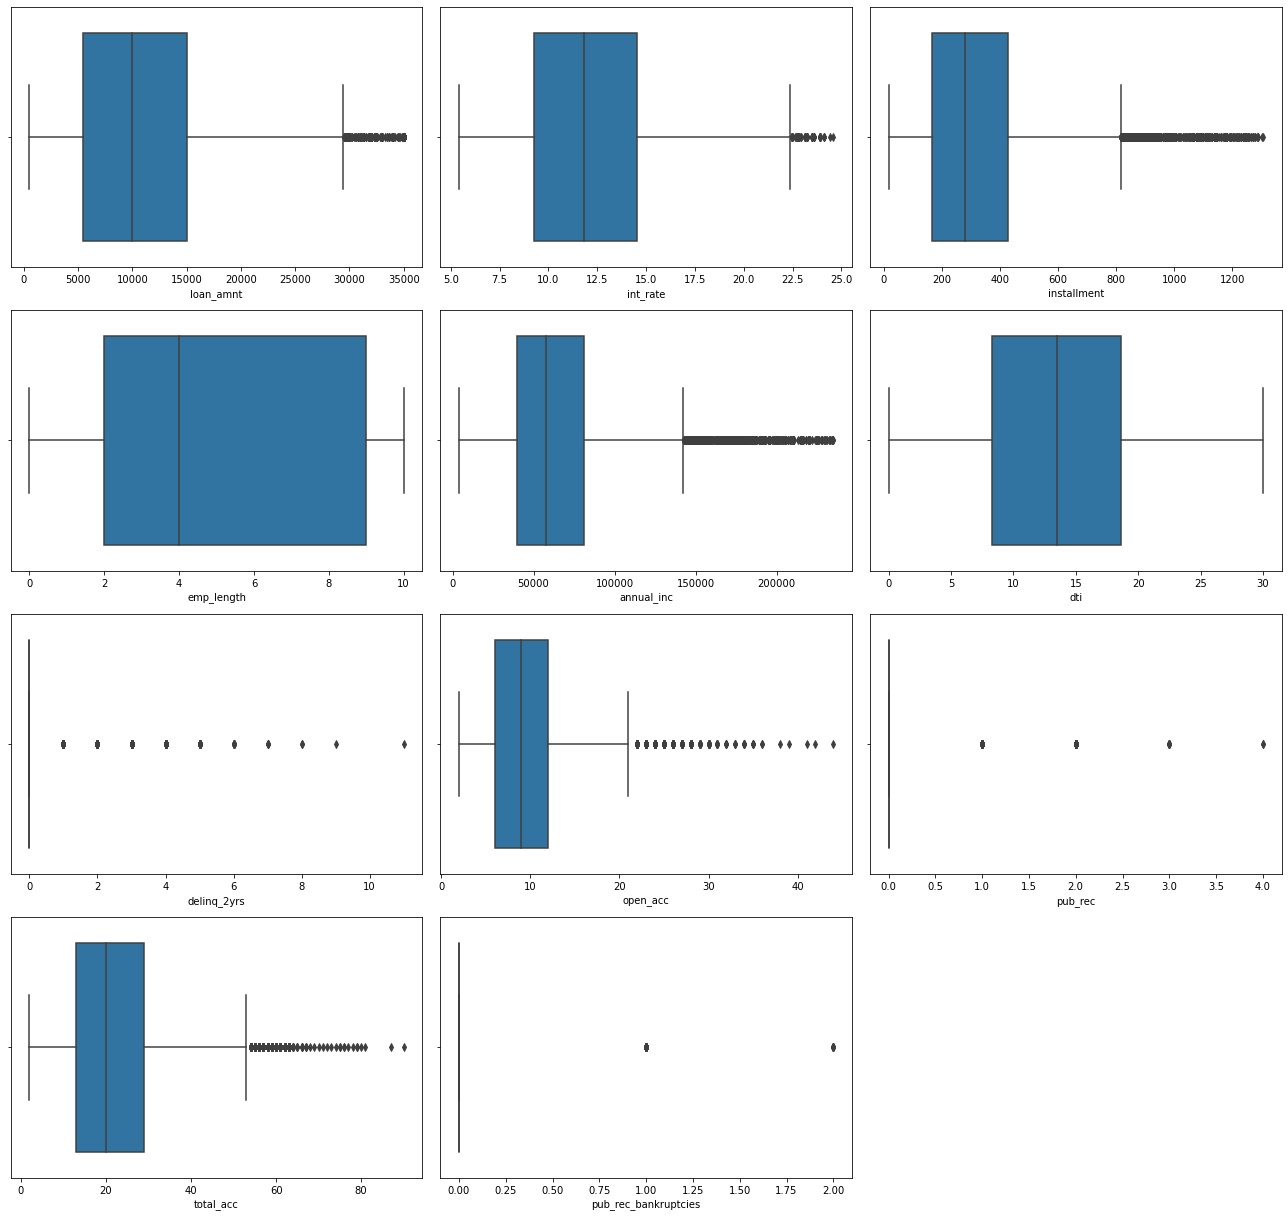

In [27]:
i=1
plt.figure(figsize=(18,25))
for var in num_vars:
    plt.subplot(6, 3, i)
    sns.boxplot(loan_pre_df[var])
    i=i+1

plt.tight_layout()
plt.show()

#Data looks fine for annual_inc
#Most of the values are 0 for delinq_2yrs, pub_rec, pub_rec_bankruptcies

In [28]:
#Analyse the cat_vars
loan_pre_df[cat_vars]
loan_pre_df[cat_vars].isna().sum()
#emp_title has missing values, removing from analysis

term                      0
grade                     0
sub_grade                 0
emp_title              2417
home_ownership            0
verification_status       0
loan_status               0
addr_state                0
purpose                   0
dtype: int64

In [29]:
loan_pre_df = loan_pre_df.drop('emp_title', axis=1)
print(loan_pre_df.shape)
cat_vars.remove('emp_title')

(39319, 21)


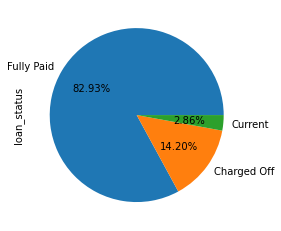

In [30]:
#Perc of loan applicants per loan_status
loan_pre_df['loan_status'].value_counts().plot.pie(autopct='%.2f%%')

plt.show()

In [31]:
##Current applicants are 2.86%, which are not needed for the analysis.
#Dropping these records
loan_df = loan_pre_df[loan_pre_df.loan_status != 'Current']
loan_df.shape

(38193, 21)

<b>Derived Metrics</b>

In [32]:
#derive year and month from issue_d

loan_df['issue_year'] = pd.DatetimeIndex(pd.to_datetime(loan_df['issue_d'], format='%b-%y')).year
loan_df['issue_month'] = pd.DatetimeIndex(pd.to_datetime(loan_df['issue_d'], format='%b-%y')).month

cat_vars.append('issue_year')
cat_vars.append('issue_month')
loan_df.shape

(38193, 23)

In [33]:
#Categorical variables from numerical variables - Bins [Needed??]
#annual_inc_bin
#loan_amnt_bin
#int_rate_bin

In [34]:
##Univariate Analysis
##Yearwise analysis for number of loan applicants
##Number of loan applicants per loan_status
##Annual Income analysis per loan_status
##Loan amount analysis per loan_status
##loan applicants per term
##
##
cat_vars

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'addr_state',
 'purpose',
 'issue_year',
 'issue_month']

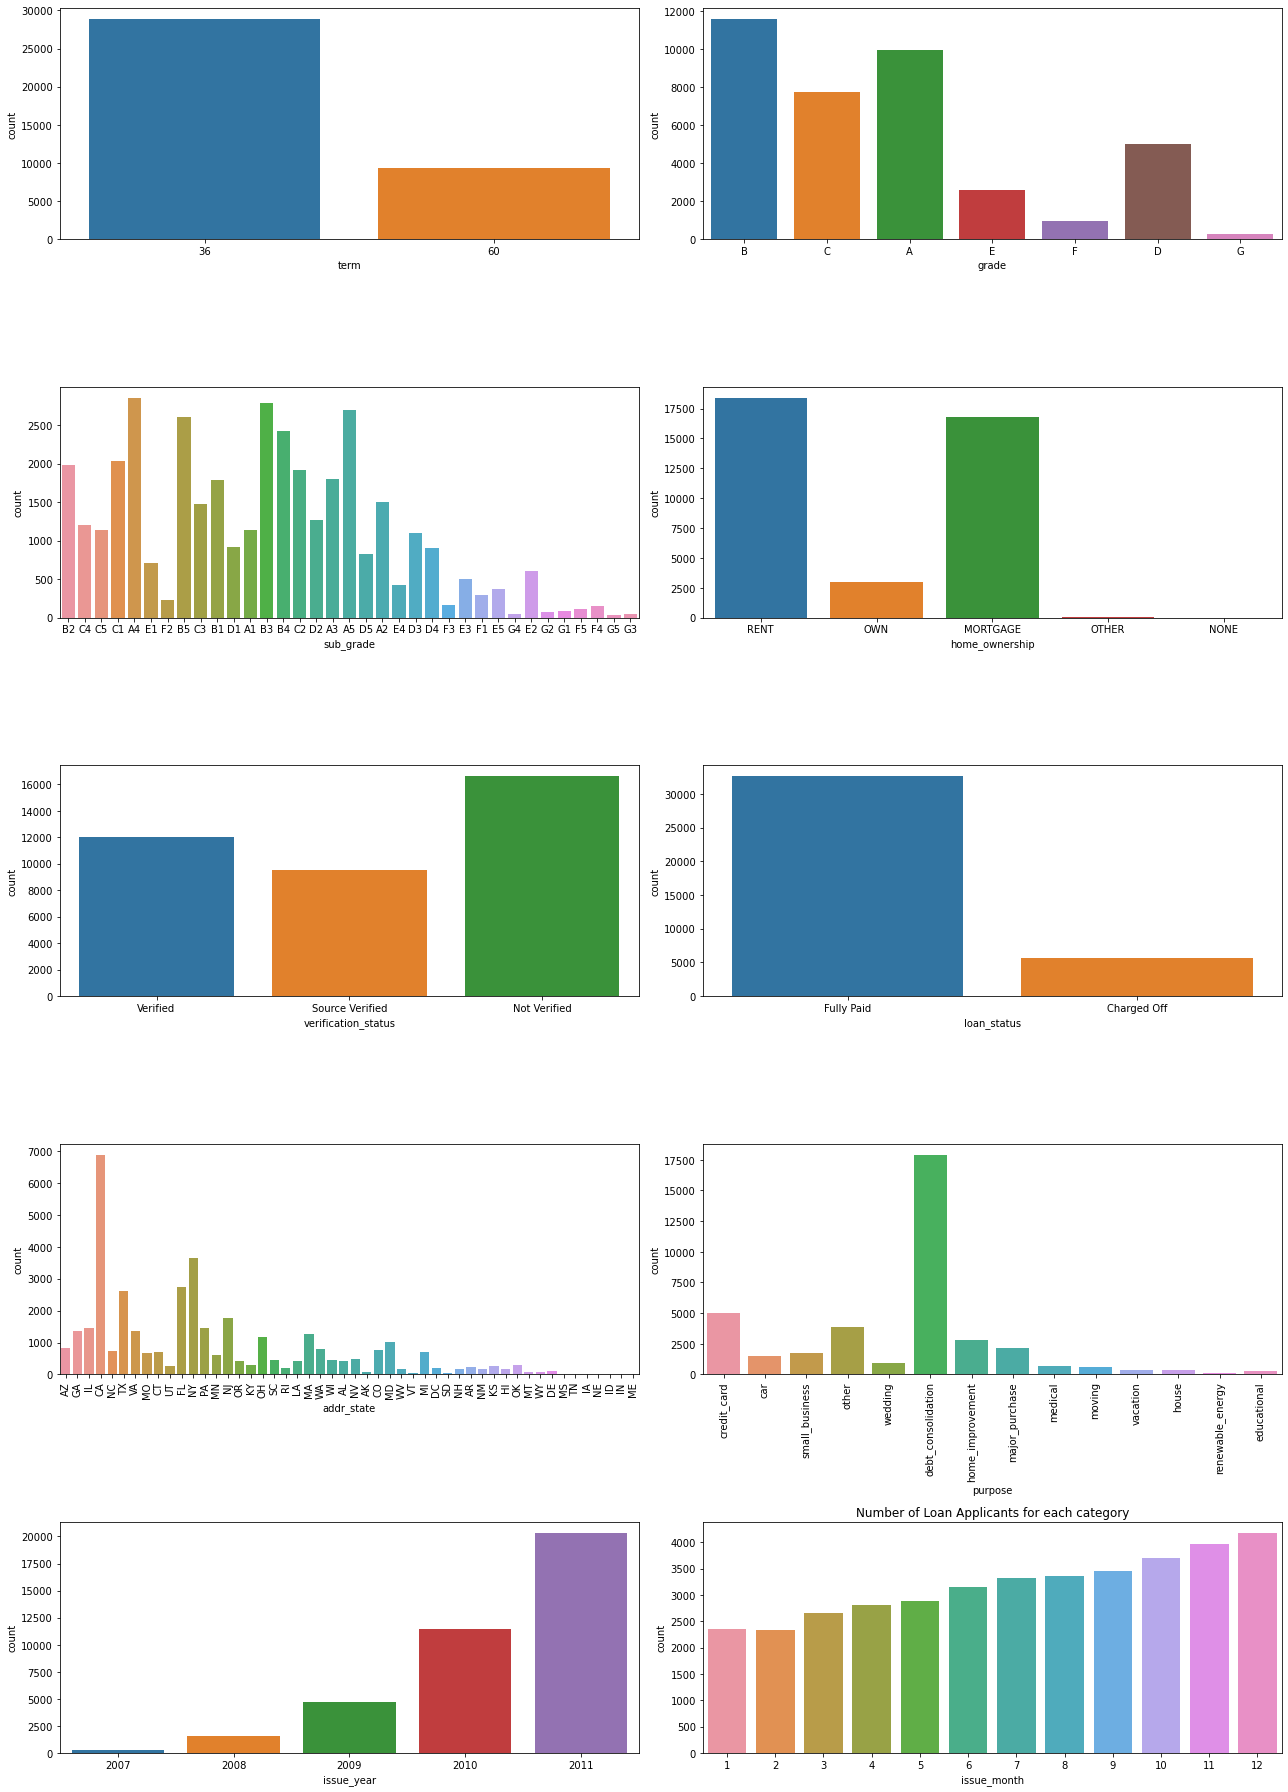

In [35]:
##Number of Loan applicants per category

i=1
plt.figure(figsize=(18,25))
for var in cat_vars:
    plt.subplot(5, 2, i)
    sns.countplot(data=loan_df,x=var)
    if var in ['addr_state','purpose']:
        plt.xticks(rotation=90)
    i=i+1

plt.title('Number of Loan Applicants for each category')
plt.tight_layout()
plt.show()


In [36]:
##Observations
#Most of applicants take loan for term of 36 months
#Most applicants belong to employment grade = B, A and Subgrade = A4, B4, A5, B5, Grades = f, G has very less applicants
#Most loan applicants have rented house or house which is Mortgage. Own house applicants are less
#Income is not verified for most of the applicants
#Most applicants are from State = CA
#Most applicants take loan for debt_consolidation [Does it have correlation with home ownership]
#Loan is issued more in Year = 2011 and the number increase monthly and more issues towards the end of year

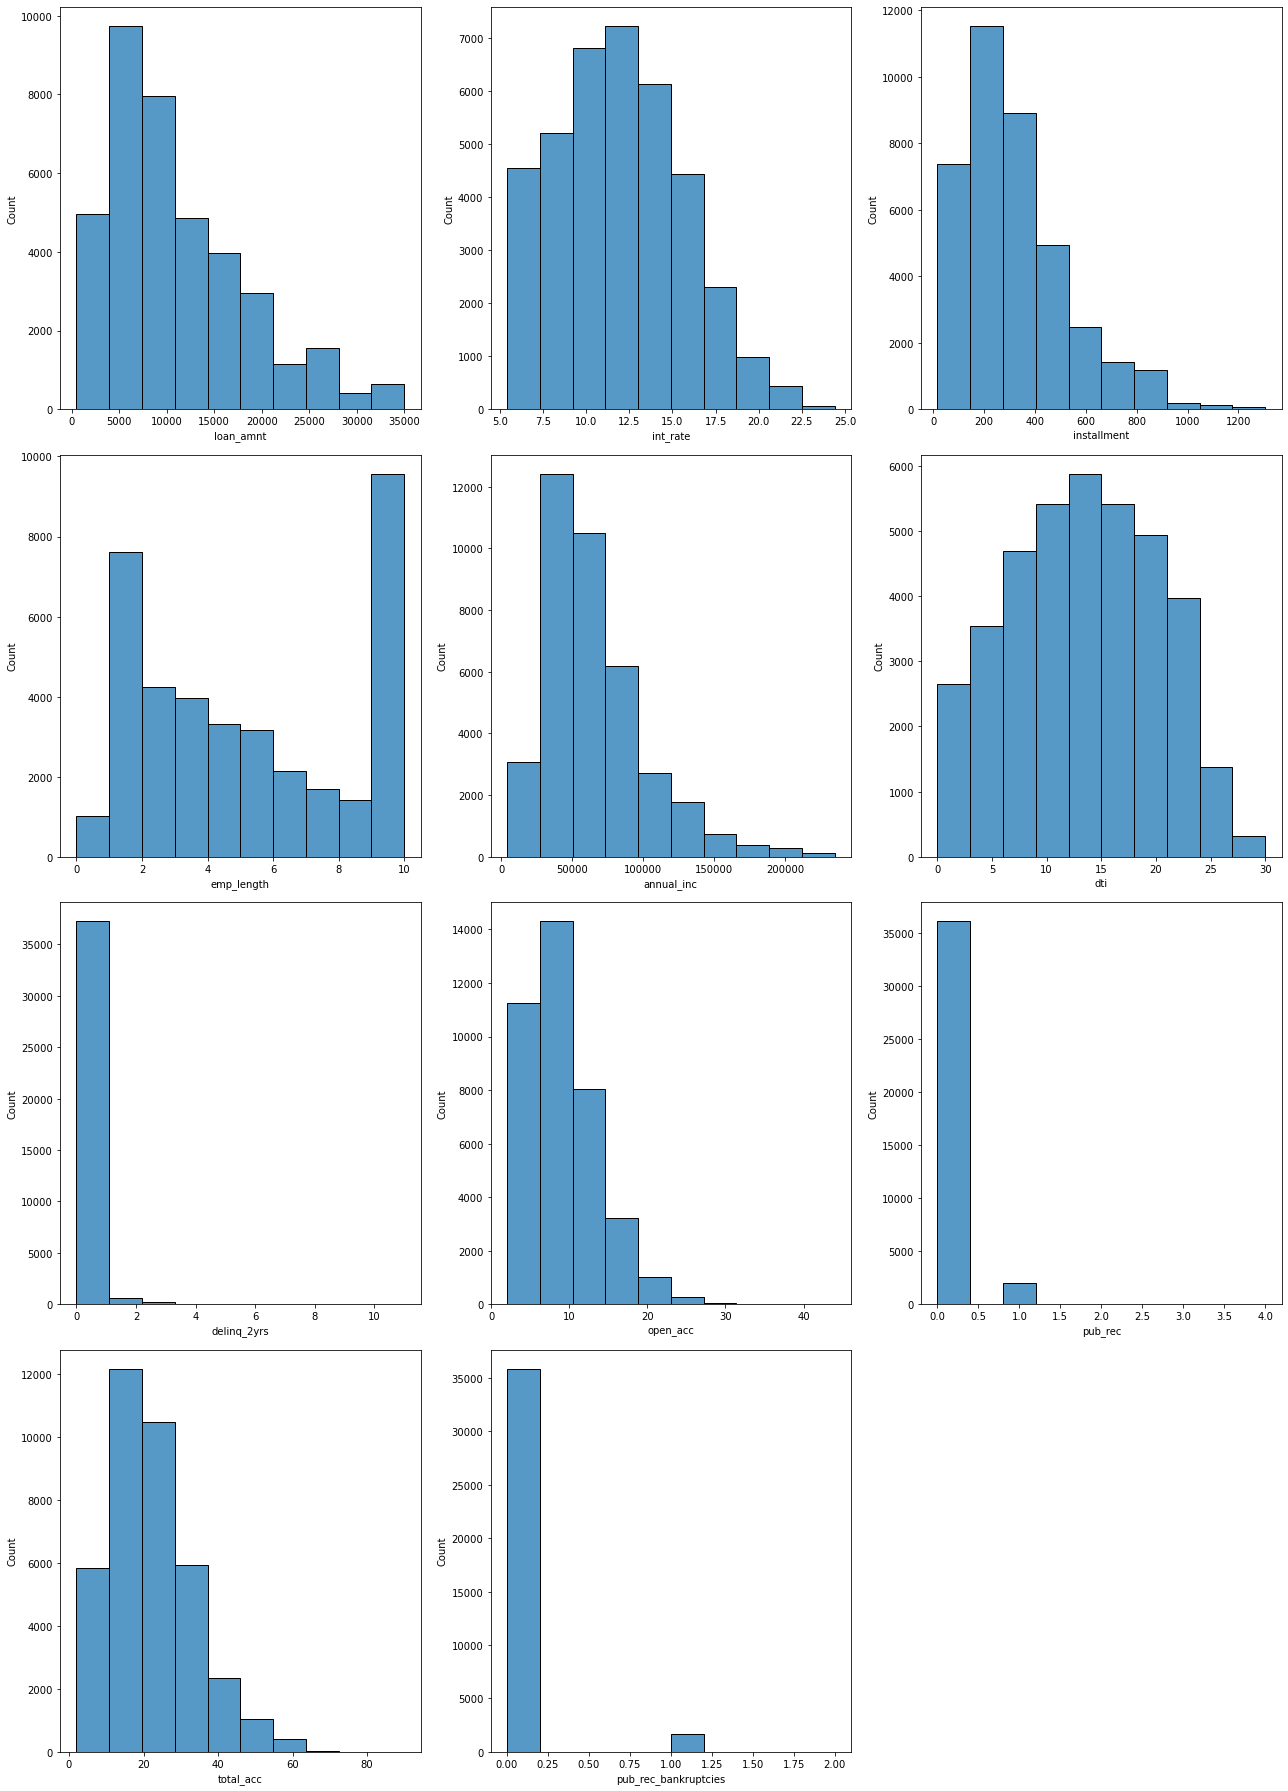

In [37]:
i=1
plt.figure(figsize=(18,25))
for var in num_vars:
    plt.subplot(4, 3, i)
    sns.histplot(loan_df[var],bins=10)
    i=i+1

plt.tight_layout()
plt.show()

In [38]:
##Observations
#Most of the loan applicants fall in below ranges
#loan_amnt = 5k to 10k
#int_rate = 9% to 15%
#installment = 200 to 400
#emp_length = 1 to 2 years, 9 to 10 years [Less experienced and highlly experienced]
#annual_inc = 25k to 75k
#dti = 10 to 20
#delinq_2_yrs, pub_rec, pub_rec_bankruptcies = 0
#open_acc = <=10
#total_acc = 10 to 20

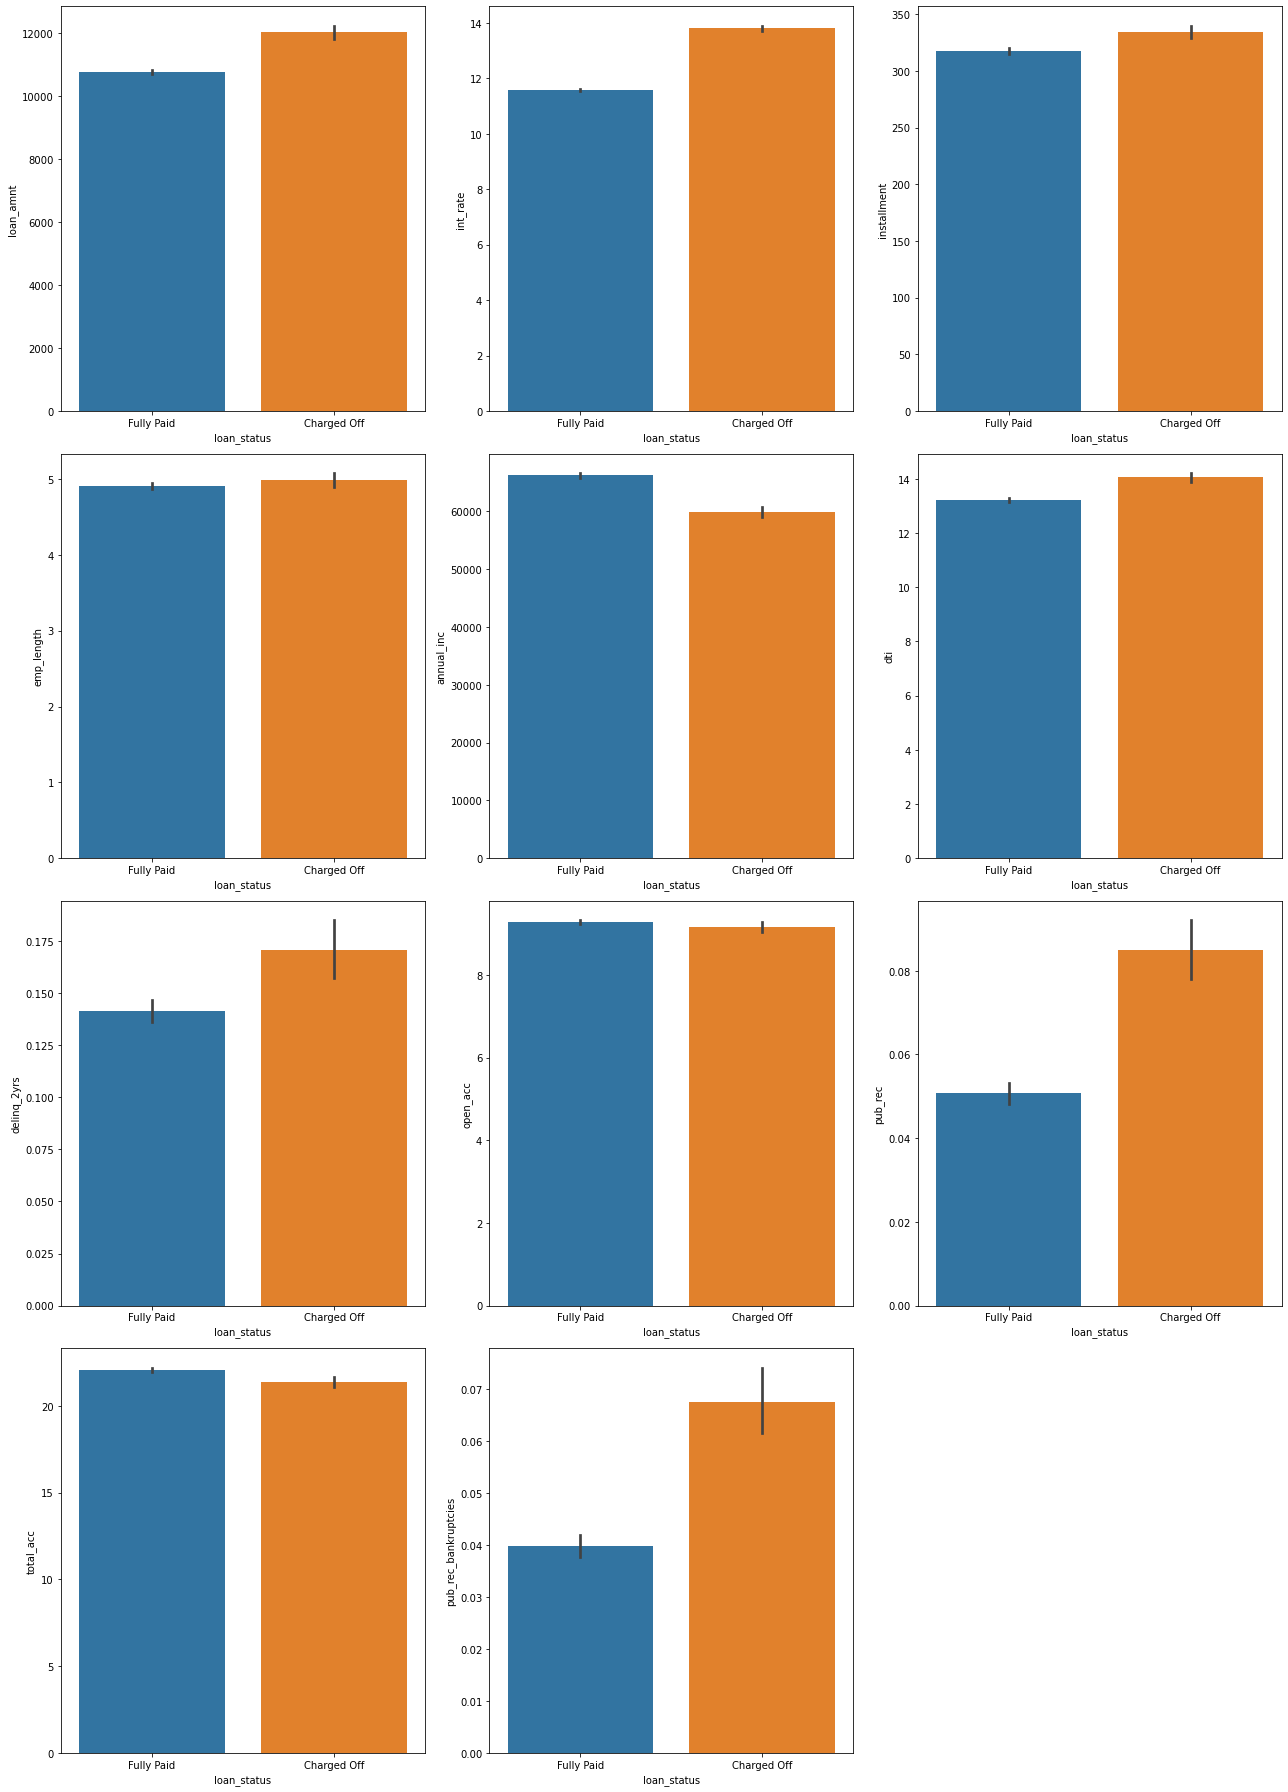

In [39]:
#Segmented
##Mean of numeric variables per loan_status
i=1
plt.figure(figsize=(18,25))
for var in num_vars:
    plt.subplot(4, 3, i)
    sns.barplot(data = loan_df, x = 'loan_status', y = var, estimator = np.mean)
    i=i+1

plt.tight_layout()
plt.show()

In [40]:
#Observations
#Loan amount, int_rate - high for defaulters [indicator]
#annual_inc - high for fullypaid. Defaulters have comparitively less. [indicator]
#open_acc, total_acc - not much variation between fully_paid vs defaulters
#pub_rec, pub_rec_bankruptcies, delinq_2yrs - high for defaulters [indicator]
#emp_length - not much difference
#dti - comparitively high for defaulters, not much difference between fully_paid to defaulters.

In [41]:
##Bivariate

In [42]:
cat_vars_set1 = cat_vars
cat_vars_set2 = ['addr_state','grade','sub_grade']

In [43]:
cat_vars_set1 = list(set(cat_vars_set1) - set(cat_vars_set2))
cat_vars_set1.remove('loan_status')
cat_vars_set1.sort()

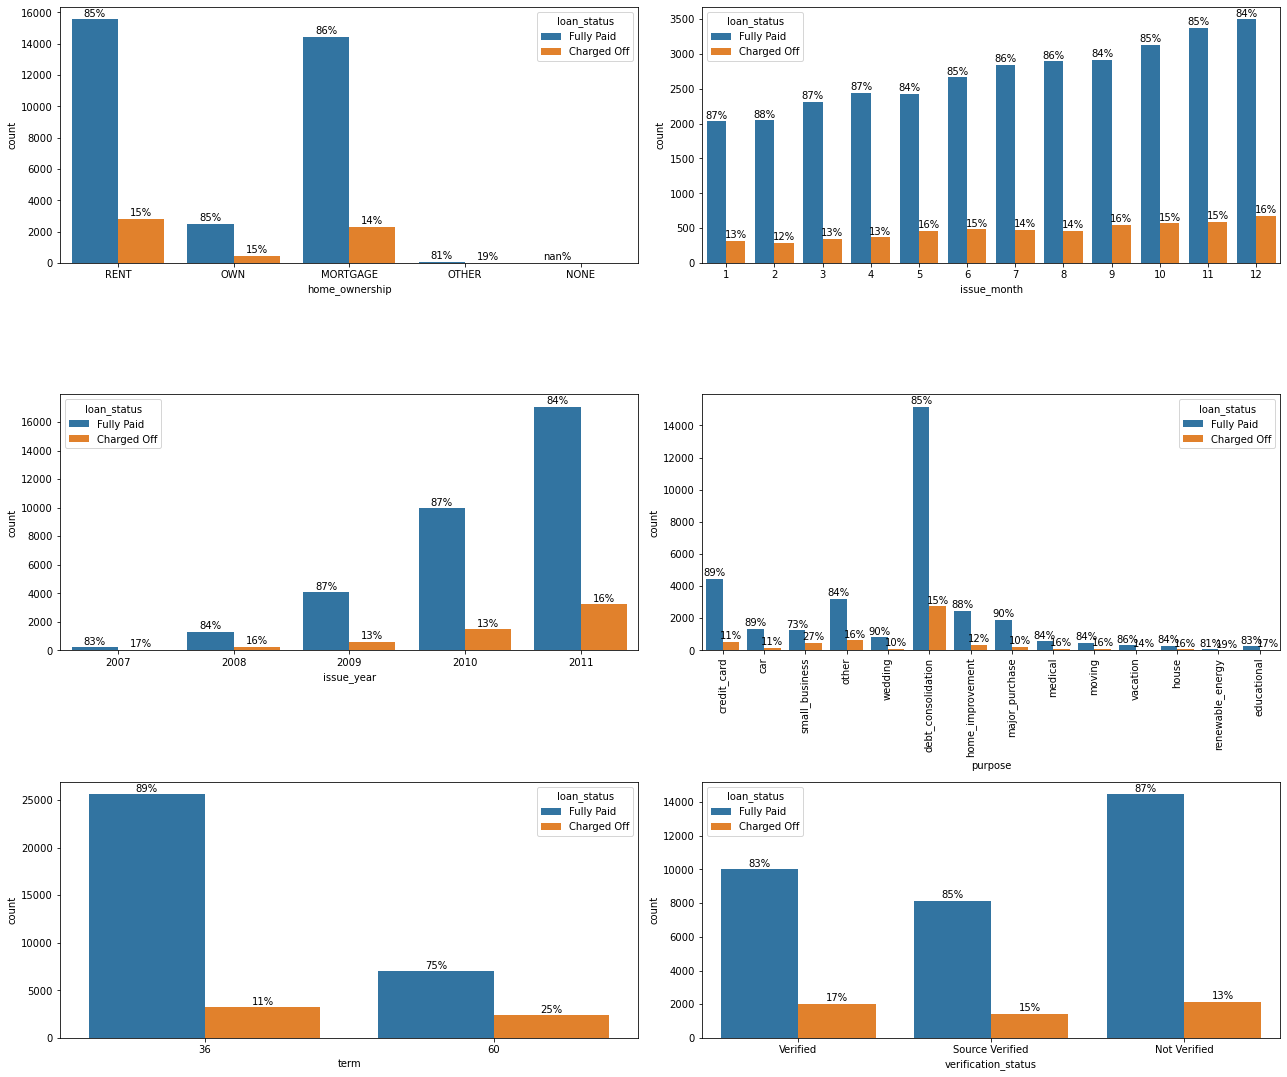

In [44]:
##Number of applicants per loan_status for each category
i=1
total_rec = loan_df.shape[0]
plt.figure(figsize=(18,20))
for var in cat_vars_set1:
    plt.subplot(4, 2, i)
    ax = sns.countplot(data=loan_df,x=var,hue='loan_status')
    if var == 'purpose':
        plt.xticks(rotation=90)
    var_unique_count = loan_df[var].unique().size
    bars = ax.patches
    for m in range(var_unique_count):
        hueBars = bars[m:][::var_unique_count]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            percentage = f'{100 * bar.get_height()/total:.0f}%\n'
            x = bar.get_x() + bar.get_width()/2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
    i=i+1

plt.tight_layout()
plt.show()

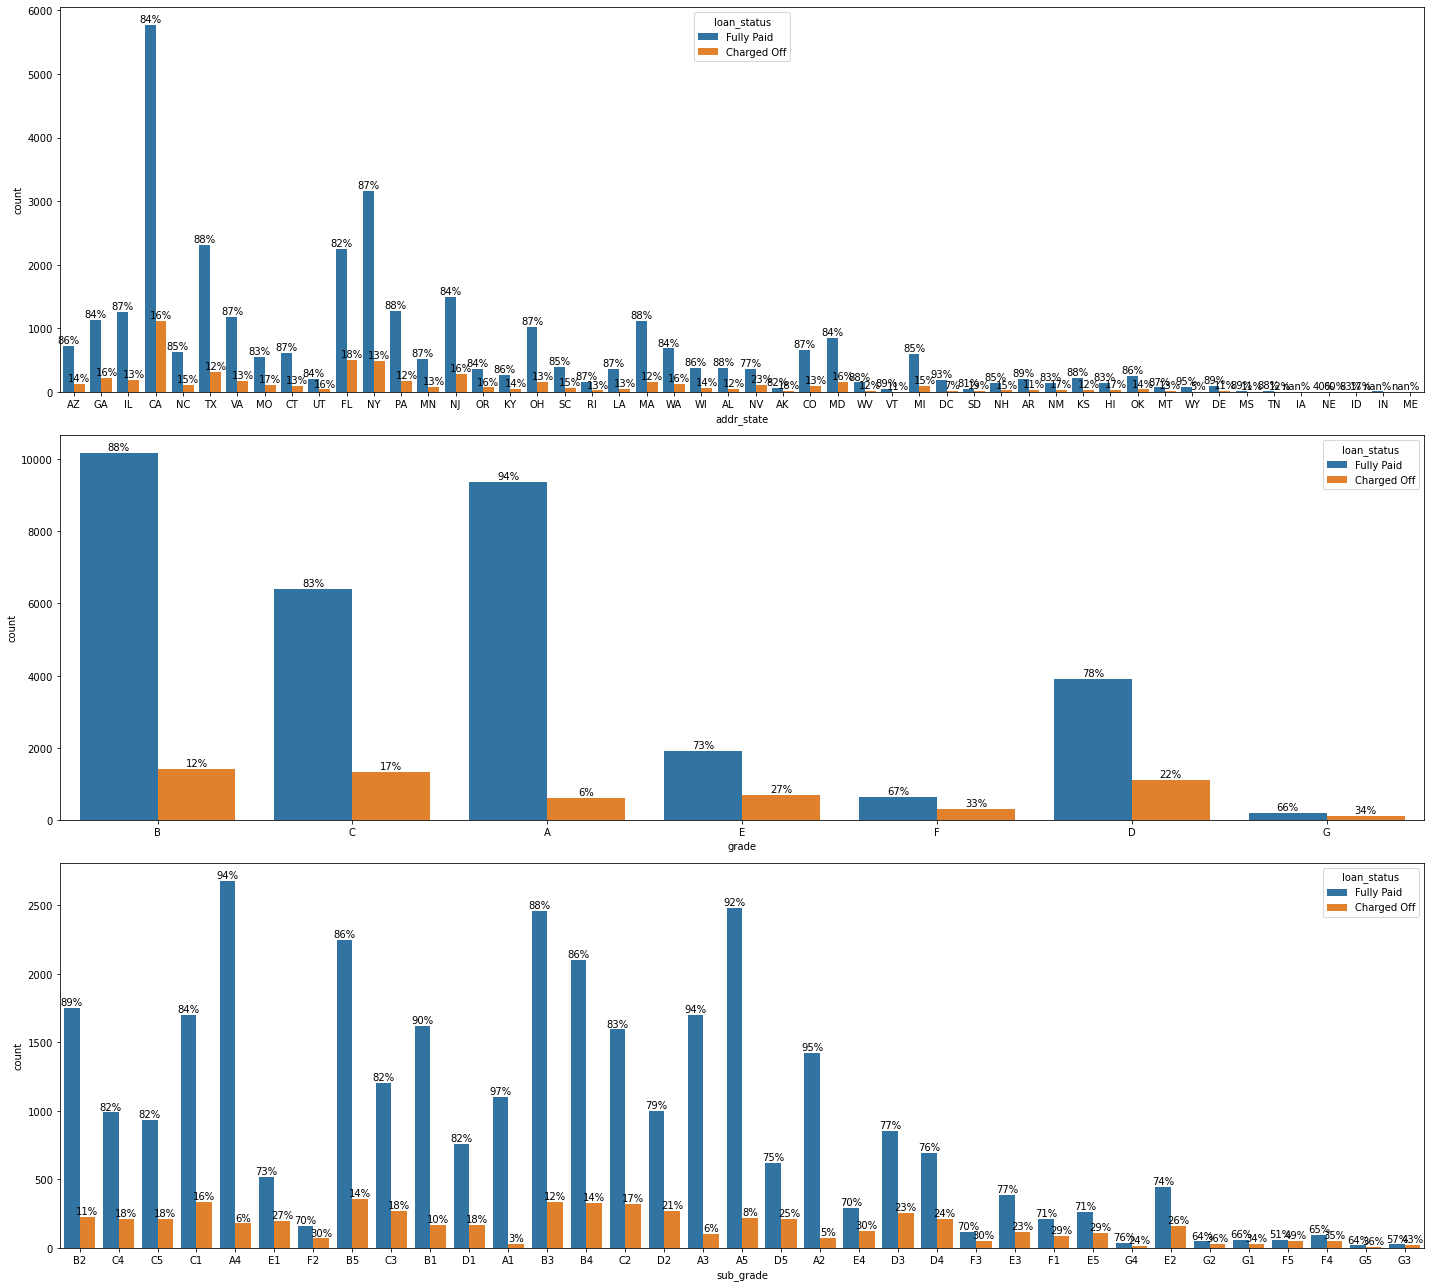

In [45]:
##Number of applicants per loan_status for each category
i=1
total_rec = loan_df.shape[0]
plt.figure(figsize=(20,18))
for var in cat_vars_set2:
    plt.subplot(3, 1, i)
    ax = sns.countplot(data=loan_df,x=var,hue='loan_status')
    var_unique_count = loan_df[var].unique().size
    bars = ax.patches
    for m in range(var_unique_count):
        hueBars = bars[m:][::var_unique_count]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            percentage = f'{100 * bar.get_height()/total:.0f}%\n'
            x = bar.get_x() + bar.get_width()/2
            y = bar.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
    i=i+1

plt.tight_layout()
plt.show()

In [46]:
#Observations
#Home ownership = %of defaulters is similar across each category of home ownership
#Year 2011 and 2008 has high % of defaulters and similar behaviour
#Monthly loan issue increases and defaulters % remains similar. Not a good indicator.
#purpose = Even though number of applicants and defaulters are high for debt_consolidation, small_business has more % defaulters
#term=36 months have fully paid loan. 60months has more % defaulters.
#income verification status is not strong indicator, not_verified status has more % fully paid. Defaulter % is similar in all status.
#More defaulters from state = CA, but %of defaulters similar in all states. Not a good indicator.
#Grades - Even though applicants are less, gardes F, G have more % defaulters.
#grades A, B have more % paid loan
#Subgrades of E,F,G has more % defaulters

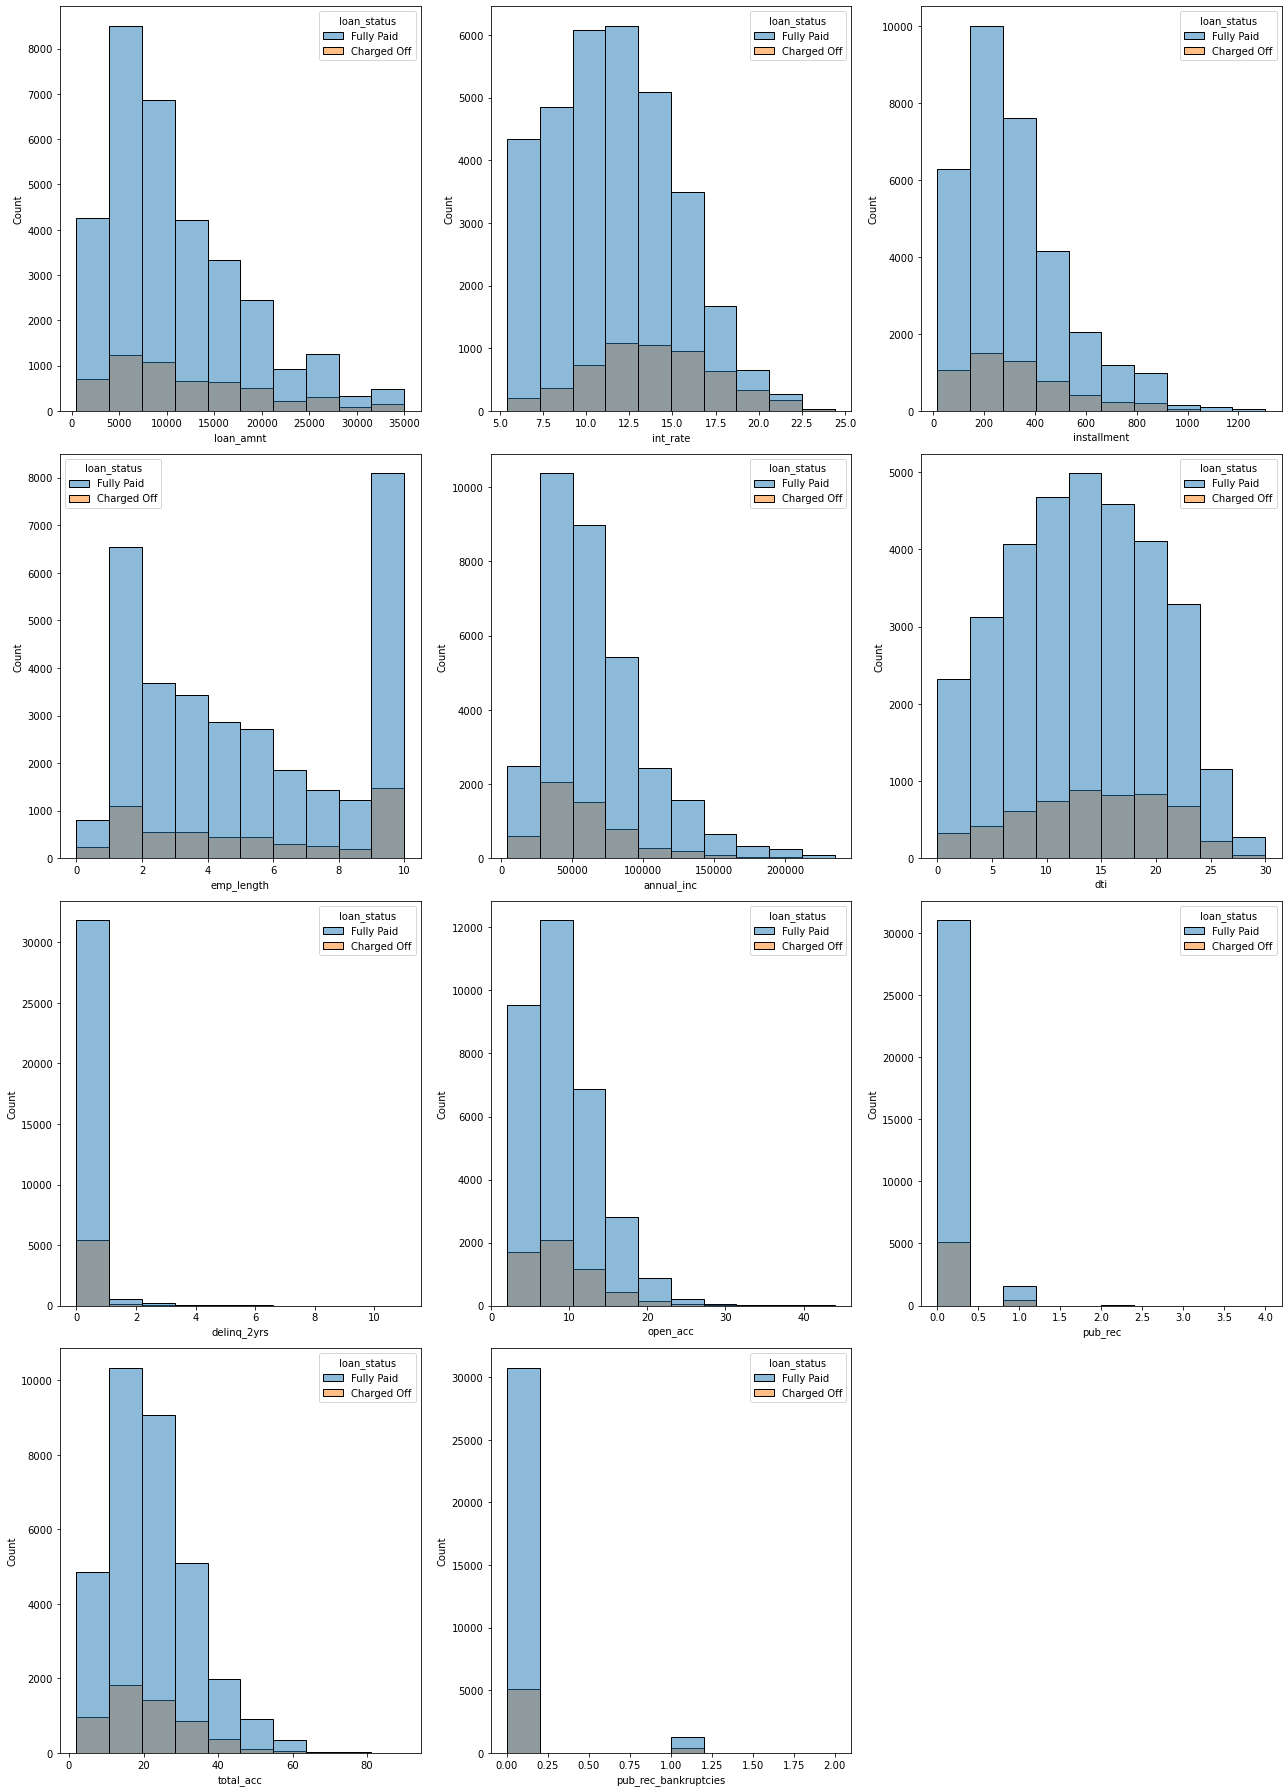

In [47]:
##Numerical variable distribution per loan_status
i=1
plt.figure(figsize=(18,25))
for var in num_vars:
    plt.subplot(4, 3, i)
    sns.histplot(data = loan_df, bins = 10, hue = 'loan_status', x = var)
    i=i+1

plt.tight_layout()
plt.show()

In [48]:
##Observations
#Most of the loan applicants fall in below ranges in general ditributions as well as defaulter distribution.
#loan_amnt = 5k to 10k 
#int_rate = 9% to 15% (General) vs 11% to 15% (Defaulter)
#installment = 200 to 400
#emp_length = 1 to 2 years, 9 to 10 years [Less experienced and highlly experienced]
#annual_inc = 25k to 75k
#dti = 10 to 20
#delinq_2_yrs, pub_rec, pub_rec_bankruptcies = 0
#open_acc = <=10
#total_acc = 10 to 20

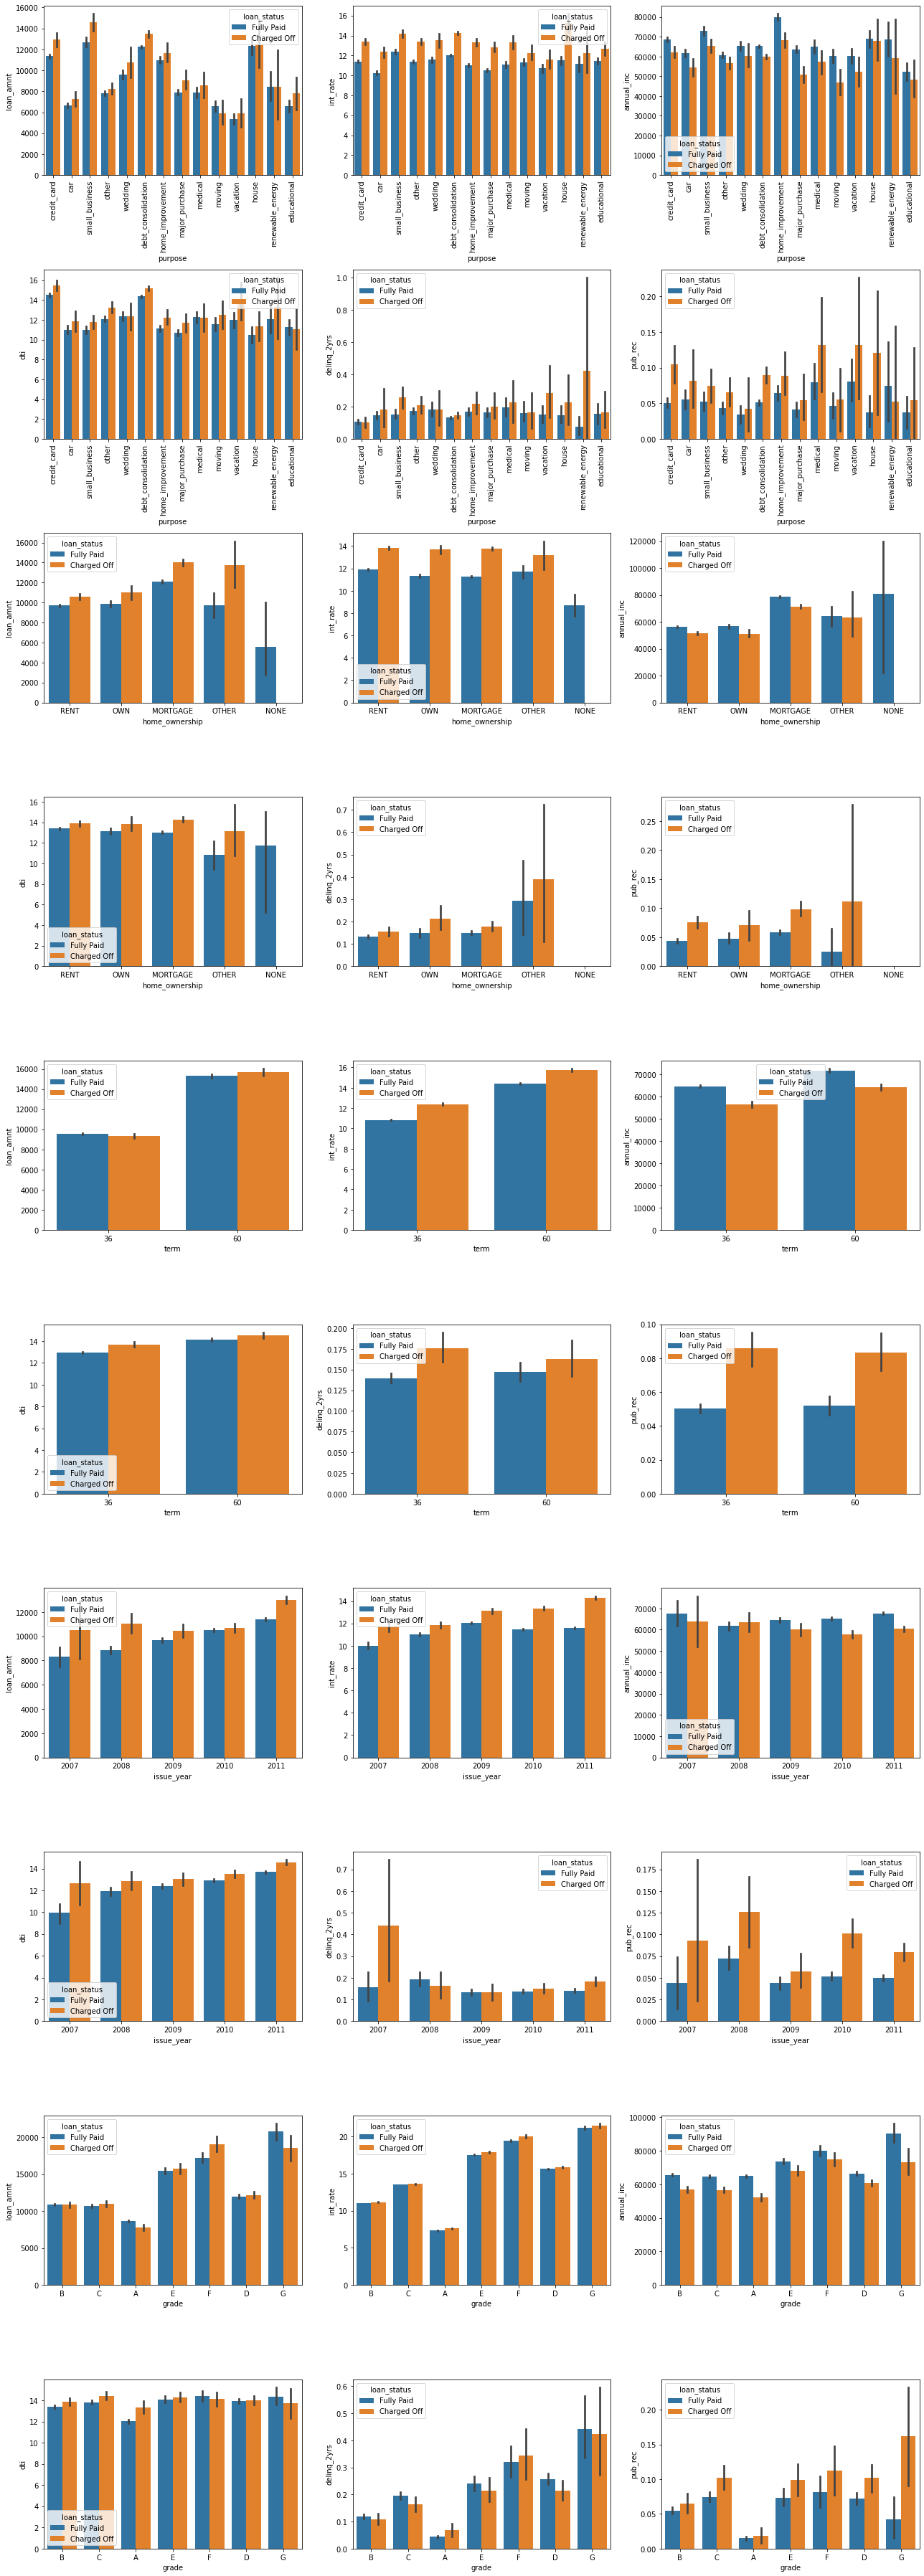

In [49]:
x_var = ['purpose','home_ownership','term','issue_year','grade']
y_var = ['loan_amnt','int_rate','annual_inc','dti','delinq_2yrs','pub_rec']

i=1
plt.figure(figsize=(18,50))
for x in x_var:
    for y in y_var:
        plt.subplot(10, 3, i)
        sns.barplot(data =loan_df,x=x, y=y, hue ='loan_status', estimator=np.mean)
        i=i+1
        if x == 'purpose':
            plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
#Observations
#Higher interest rates (average : >12%) - indicator of default
#Higher loan amount for small_business, credit_card and debt_consolidation - indicator of default
#Higher loan amount in Grade F - indicator of default
#Higher loan amount with Home ownership - Mortgage or Other - indicator of default
#Compared to defaulters, fully paid applicants having higher annual_income have less loan amount
#Grade G with more public_records and defaulters.
#Annual_inc high for Grade G and Less for grade A
#Applicants with public_record - likely to default
#in 2011, loan_amount and int_rate high for defaulters
#purpose credit_card and debt_cosolidation has defaulters with high dti.
#

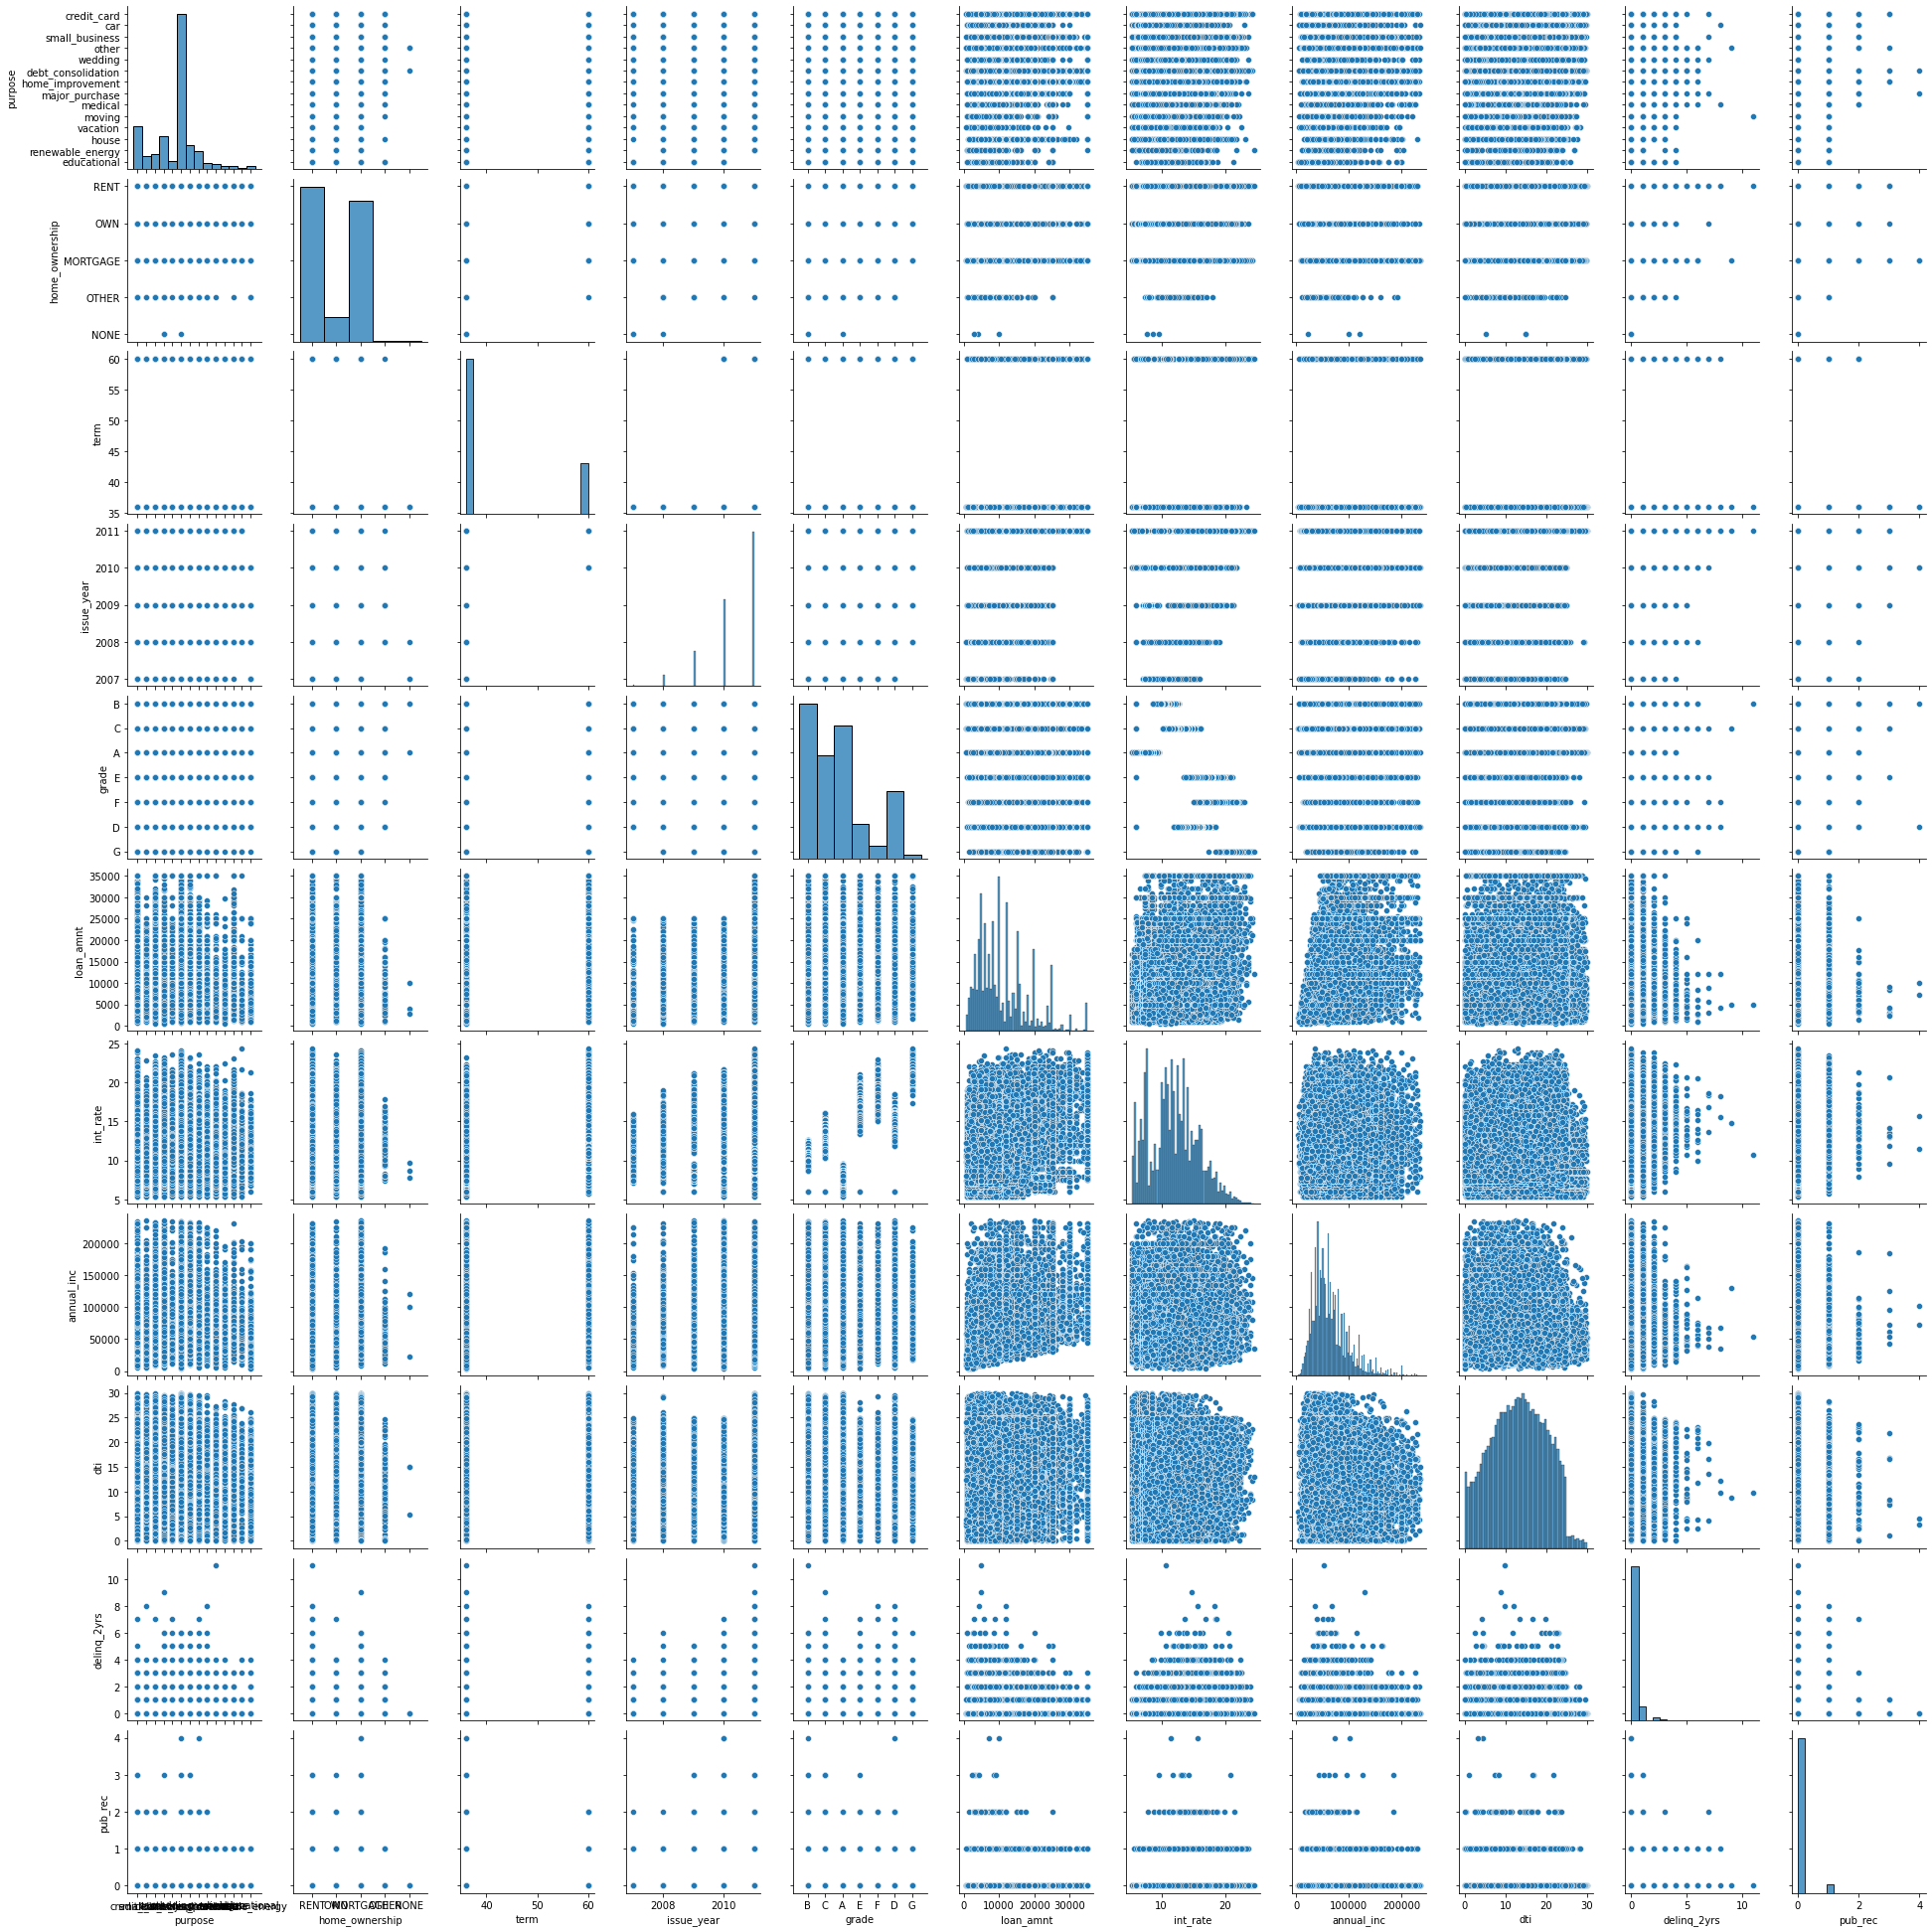

In [51]:
#Pair Plot
sns.pairplot(loan_df,vars=x_var+y_var)
plt.show()

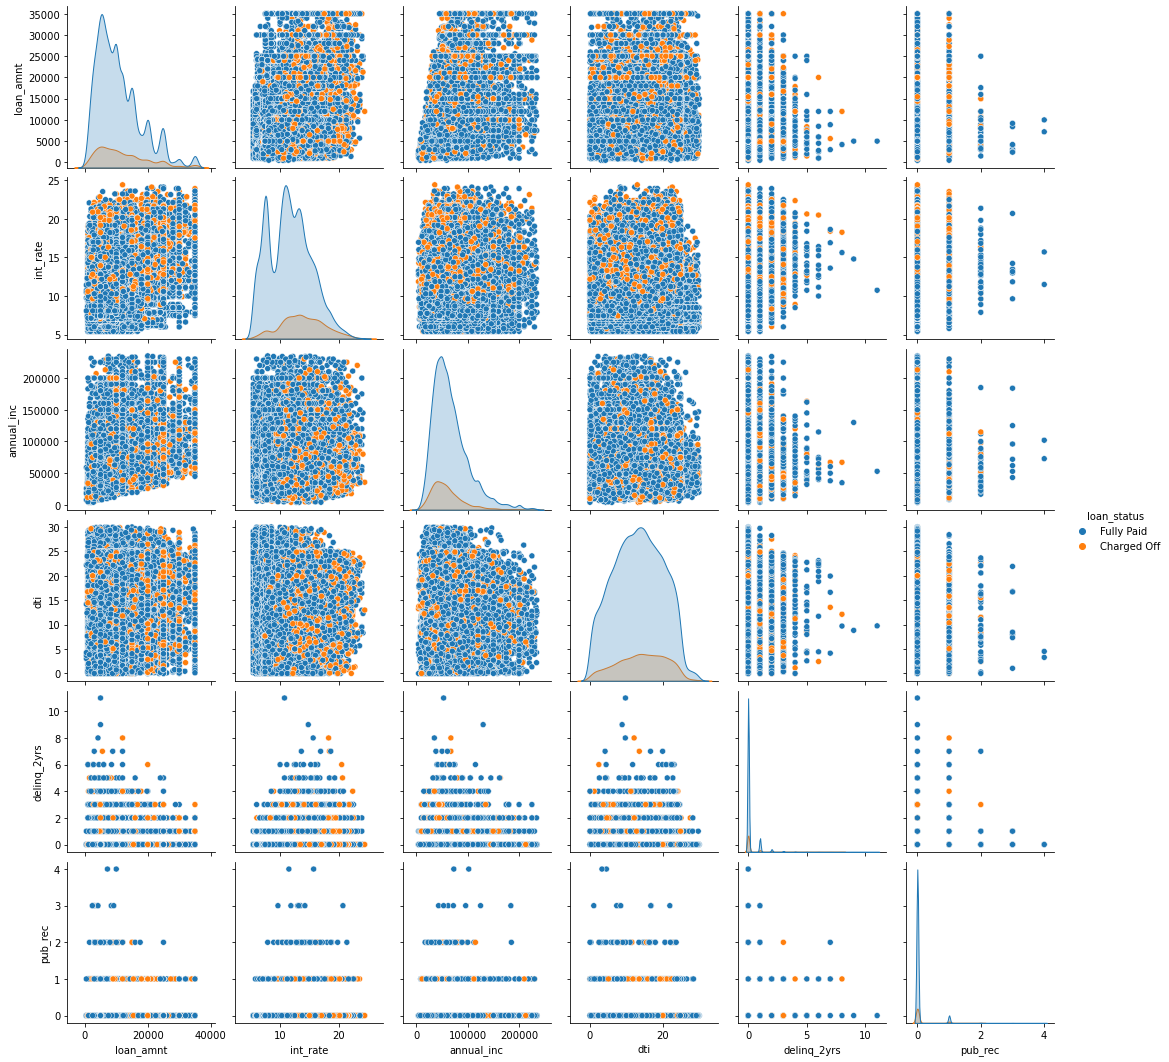

In [52]:
sns.pairplot(loan_df,vars=y_var, hue = 'loan_status')
plt.show()

In [ ]:
#Observations
#Applicants with a  public record and loan_amount/dti more than average is likely to default
#int_rate high, likely to default irrespective of other features
#Low annual_inc , high loan_amount or high int_rate , more likely to default
#High loan amount, high dti , more likely to default


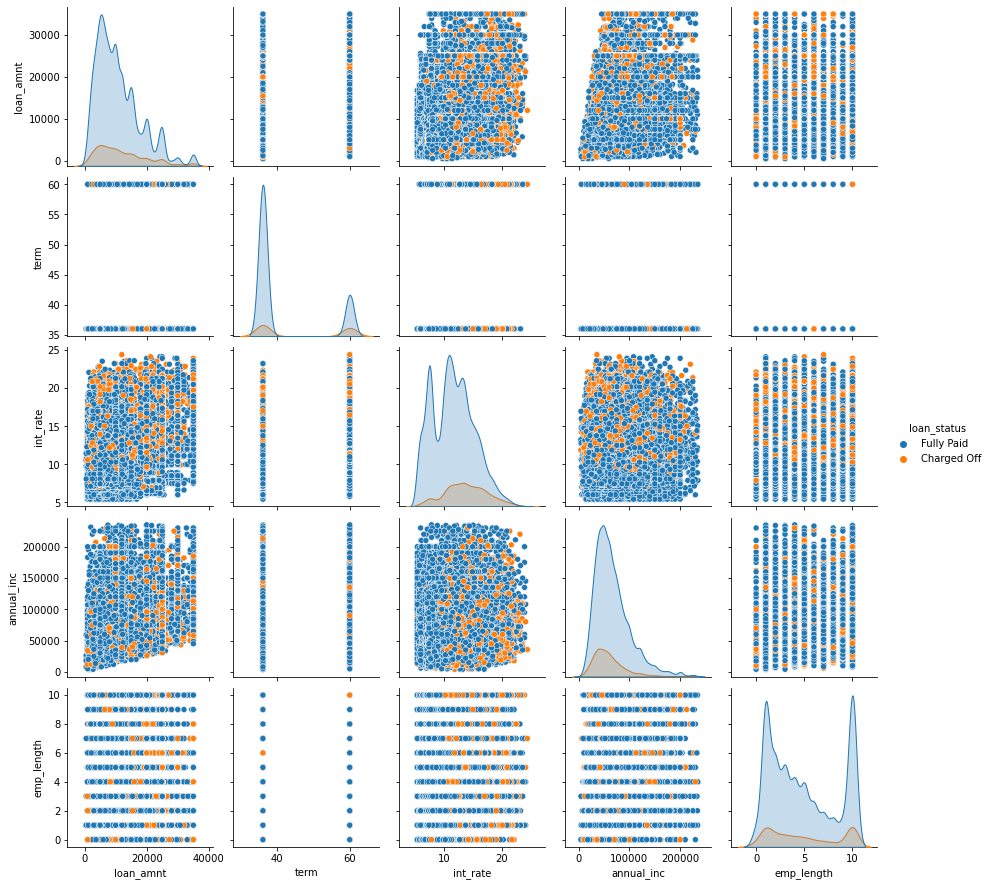

In [53]:
#Pair plot for important variables
sns.pairplot(loan_df,vars=['loan_amnt','term','int_rate','annual_inc','emp_length'], hue = 'loan_status')
plt.show()

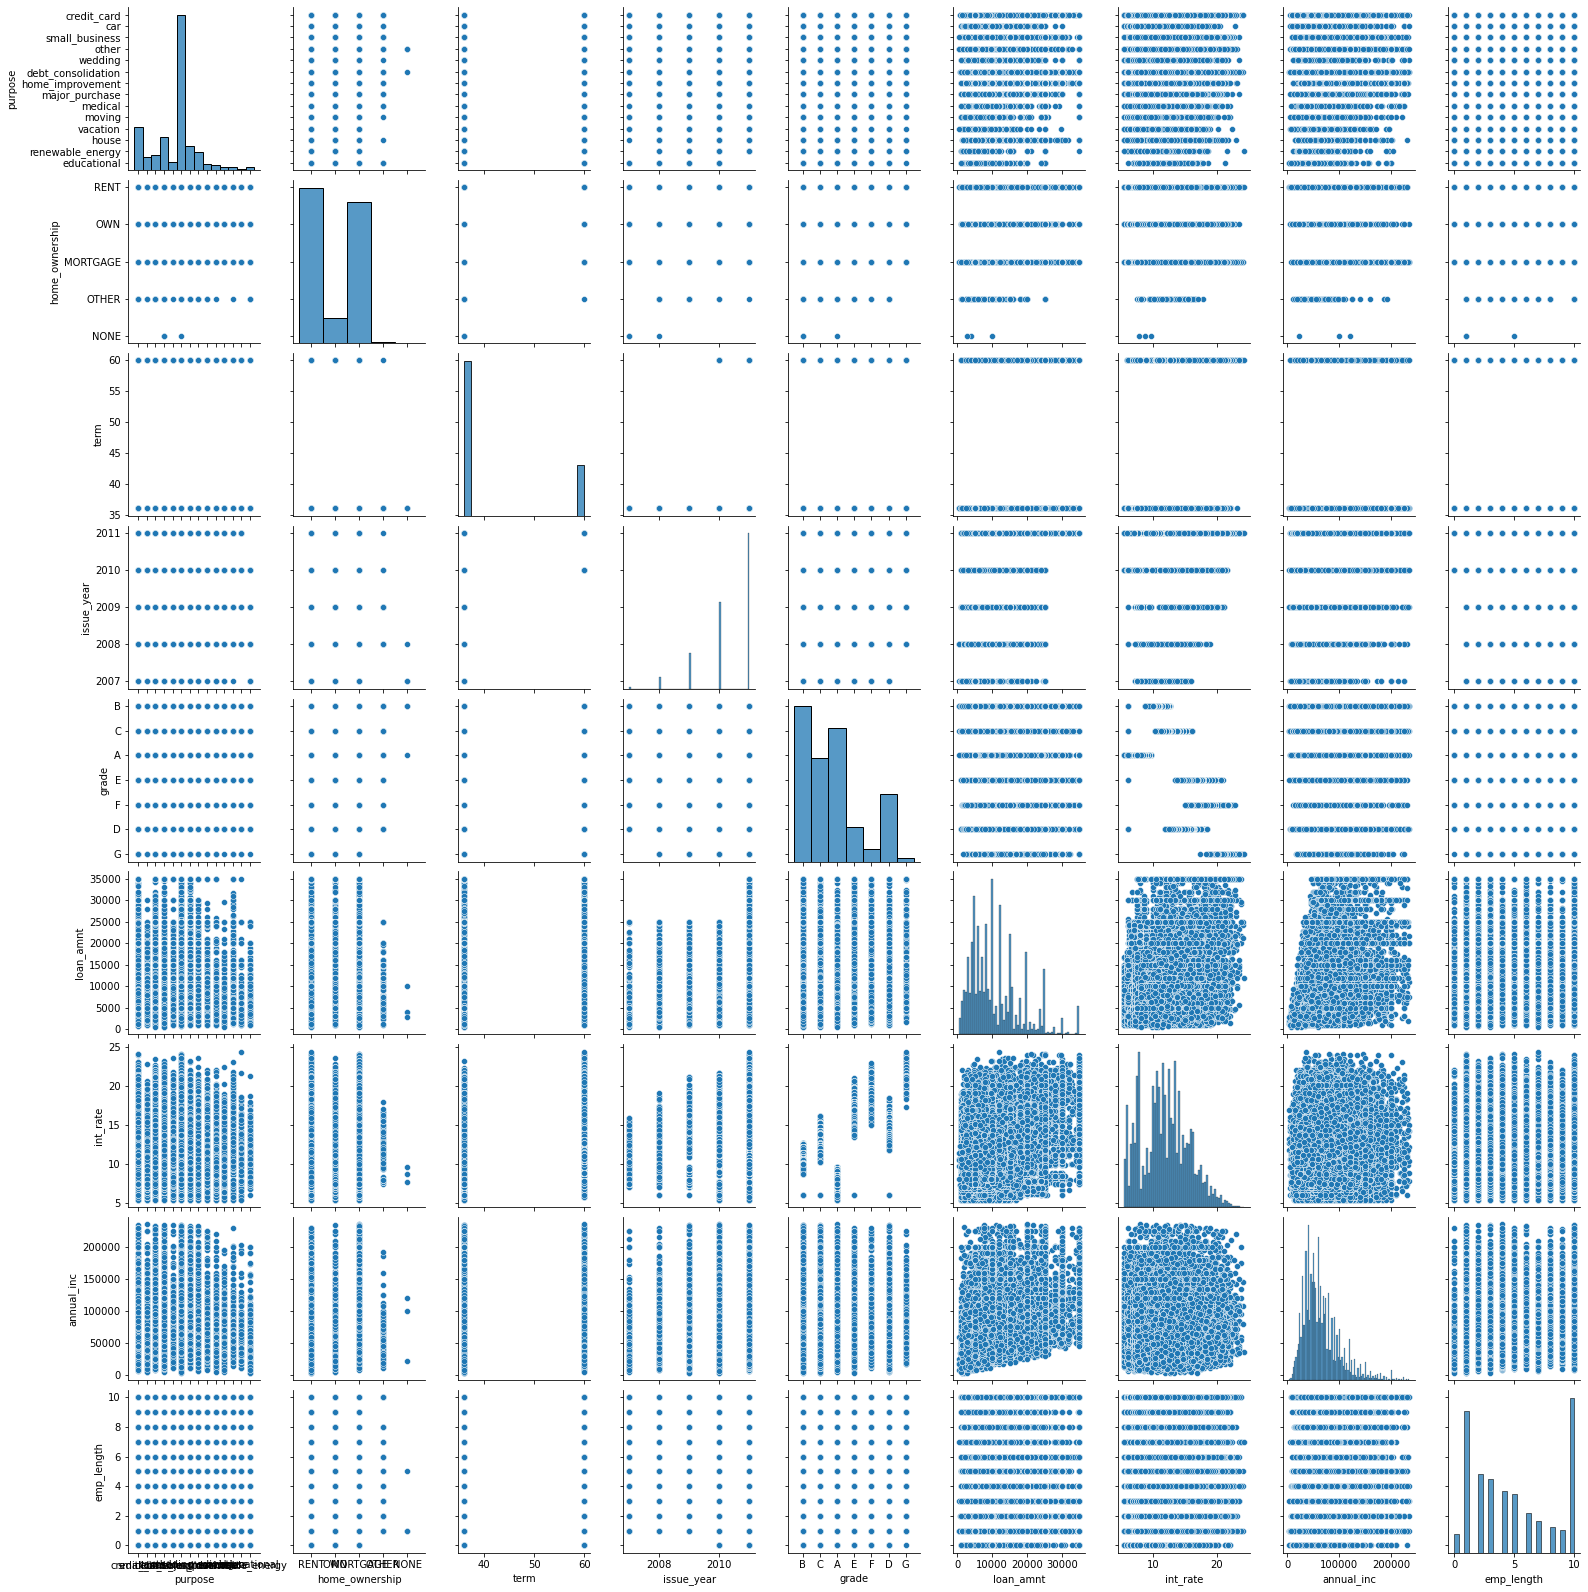

In [61]:
#Pair plot for categorical variables
sns.pairplot(loan_df,vars=x_var+['loan_amnt','int_rate', 'annual_inc','emp_length'])
plt.show()

In [62]:
loan_df['defaulted'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [63]:
num_vars.append('defaulted')

In [64]:
##Correlation Matrix
loan_df.corr()

loan_amnt      term  int_rate  installment  emp_length  \
loan_amnt              1.000000  0.348684  0.298393     0.931735    0.156676   
term                   0.348684  1.000000  0.438967     0.091394    0.103893   
int_rate               0.298393  0.438967  1.000000     0.275172    0.011493   
installment            0.931735  0.091394  0.275172     1.000000    0.130843   
emp_length             0.156676  0.103893  0.011493     0.130843    1.000000   
annual_inc             0.414847  0.073305  0.066540     0.412153    0.190154   
dti                    0.071841  0.077367  0.113477     0.061632    0.051905   
delinq_2yrs           -0.035087  0.006699  0.156831    -0.022928    0.015058   
inq_last_6mths         0.009577  0.047627  0.133107     0.007608    0.010451   
open_acc               0.174342  0.045676  0.001982     0.169552    0.099984   
pub_rec               -0.048784  0.010151  0.100051    -0.044427    0.050636   
total_acc              0.250876  0.096101 -0.052280     0.223629    0.203969   
pub_rec_bankruptcies  -0.033998  0.014215  0.084362    -0.031063    0.047807   
issue_year             0.108052  0.237087  0.038022     0.051026    0.095202   
issue_month            0.052362  0.032594  0.025963     0.030023    0.021457   
defaulted              0.061531  0.174383  0.212382     0.028817    0.008130   

                      annual_inc       dti  delinq_2yrs  inq_last_6mths  \
loan_amnt               0.414847  0.071841    -0.035087        0.009577   
term                    0.073305  0.077367     0.006699        0.047627   
int_rate                0.066540  0.113477     0.156831        0.133107   
installment             0.412153  0.061632    -0.022928        0.007608   
emp_length              0.190154  0.051905     0.015058        0.010451   
annual_inc              1.000000 -0.107875     0.026726        0.038202   
dti                    -0.107875  1.000000    -0.031976        0.004997   
delinq_2yrs             0.026726 -0.031976     1.000000        0.007538   
inq_last_6mths          0.038202  0.004997     0.007538        1.000000   
open_acc                0.262339  0.292404     0.011806        0.092627   
pub_rec                -0.020332 -0.005540     0.008531        0.024718   
total_acc               0.378811  0.236049     0.065533        0.111523   
pub_rec_bankruptcies   -0.017200  0.005027     0.004026        0.016054   
issue_year              0.032284  0.092161    -0.003983       -0.059189   
issue_month             0.015090  0.014993    -0.011271        0.013908   
defaulted              -0.064496  0.044223     0.020966        0.073473   

                      open_acc   pub_rec  total_acc  pub_rec_bankruptcies  \
loan_amnt             0.174342 -0.048784   0.250876             -0.033998   
term                  0.045676  0.010151   0.096101              0.014215   
int_rate              0.001982  0.100051  -0.052280              0.084362   
installment           0.169552 -0.044427   0.223629             -0.031063   
emp_length            0.099984  0.050636   0.203969              0.047807   
annual_inc            0.262339 -0.020332   0.378811             -0.017200   
dti                   0.292404 -0.005540   0.236049              0.005027   
delinq_2yrs           0.011806  0.008531   0.065533              0.004026   
inq_last_6mths        0.092627  0.024718   0.111523              0.016054   
open_acc              1.000000  0.000876   0.686514              0.007008   
pub_rec               0.000876  1.000000  -0.022234              0.847171   
total_acc             0.686514 -0.022234   1.000000             -0.009415   
pub_rec_bankruptcies  0.007008  0.847171  -0.009415              1.000000   
issue_year            0.010952 -0.005603   0.052335              0.000636   
issue_month           0.000631 -0.022648   0.002629             -0.021700   
defaulted            -0.009093  0.050645  -0.022215              0.047640   

                      issue_year  issue_month  defaulted  
loan_amnt       

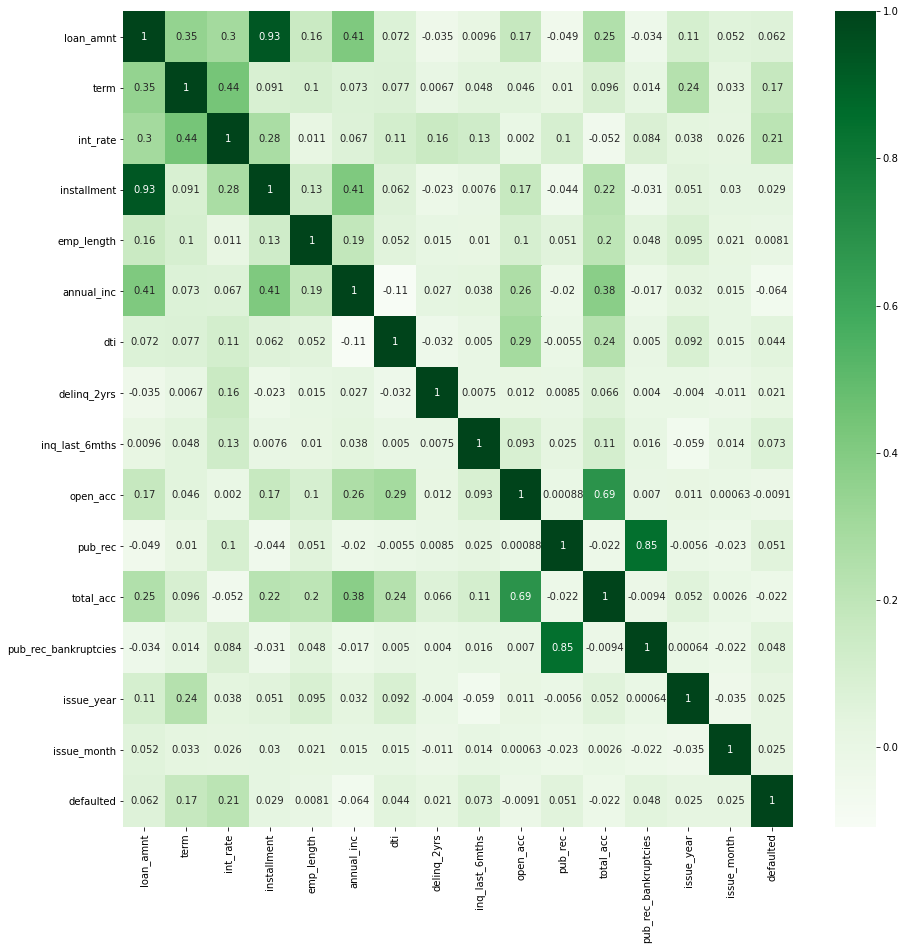

In [65]:

corr = loan_df.corr()
plt.figure(figsize=[15,15])
sns.heatmap(corr,cmap = "Greens", annot=True)
plt.show()

In [283]:
#Observations
#negative correlation
#defaulted - annual_inc, open_acc, total_acc ie, annual_inc/open_acc/total_acc increases the defaulters reduces
#

In [ ]:
#Conclusion
#annual_inc high - likely to repay loan
#int_rate high - likely to default
#loan_amount high - likely to default
